In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/customer_booking.csv", encoding = "ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
# getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
# changing the data type of flight_day
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}
df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

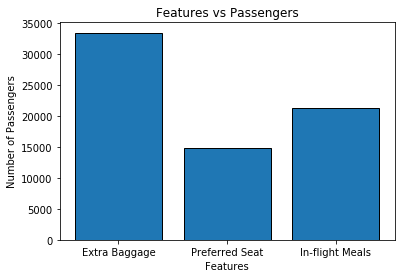

In [8]:
plt.bar(['Extra Baggage', 'Preferred Seat', 'In-flight Meals'], [df['wants_extra_baggage'].sum(), df['wants_preferred_seat'].sum(), df['wants_in_flight_meals'].sum()], edgecolor='black')
plt.xlabel('Features')
plt.ylabel('Number of Passengers')
plt.title('Features vs Passengers')
plt.show()

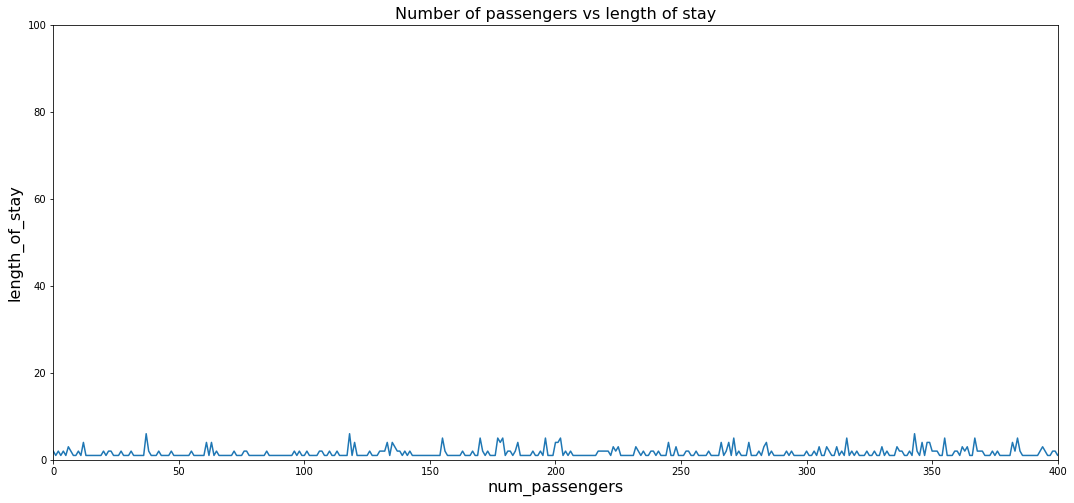

In [52]:
# Plot historical closing price
plt.figure(figsize=(18,8))
plt.title("Number of passengers vs length of stay", fontsize=16)
plt.plot(df.num_passengers)
plt.xlabel("num_passengers", fontsize=16)
plt.ylabel("length_of_stay", fontsize=16)
plt.xlim(0,400)
plt.ylim(0, 100)
plt.show()

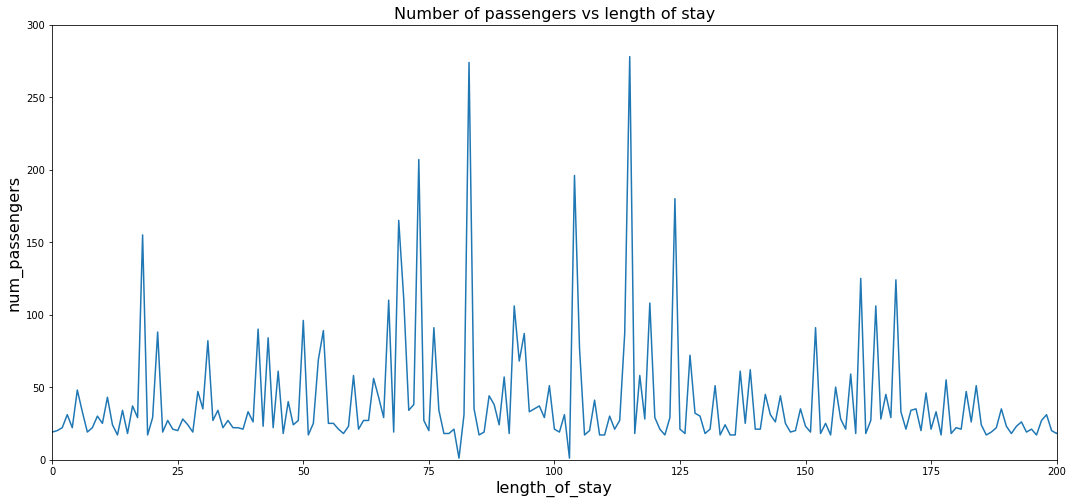

In [51]:
# Plot historical closing price
plt.figure(figsize=(18,8))
plt.title("Number of passengers vs length of stay", fontsize=16)
plt.plot(df.length_of_stay)
plt.xlabel("length_of_stay", fontsize=16)
plt.ylabel("num_passengers", fontsize=16)
plt.xlim(0,200)
plt.ylim(0, 300)
plt.show()

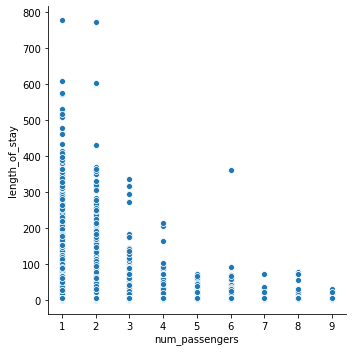

In [13]:
sns.relplot(x = 'num_passengers', y = 'length_of_stay',data = df)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [34]:
train = df.drop(['booking_complete', 'route', 'booking_origin', 'trip_type', 'sales_channel'], axis = 1)
test = df['booking_complete']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.3, random_state = 2)

In [47]:
ranf = RandomForestClassifier()

In [37]:
'''x_train = np.array(x_train)
y_train = np.array(y_train)'''

In [55]:
ranf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
predicted_labels = ranf.predict(x_test)

In [77]:
predicted_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
ranf.score(x_test, y_test)

0.8492

In [79]:
# converting df to array
actual_labels = df['booking_complete']
actual_label= actual_labels.values

In [80]:
actual_label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
importances = ranf.feature_importances_

In [56]:
feature_importances = pd.DataFrame({'Feature':x_train.columns, 'Importance': importances})

feature_importances = feature_importances.sort_values(by = 'Importance', ascending = False)

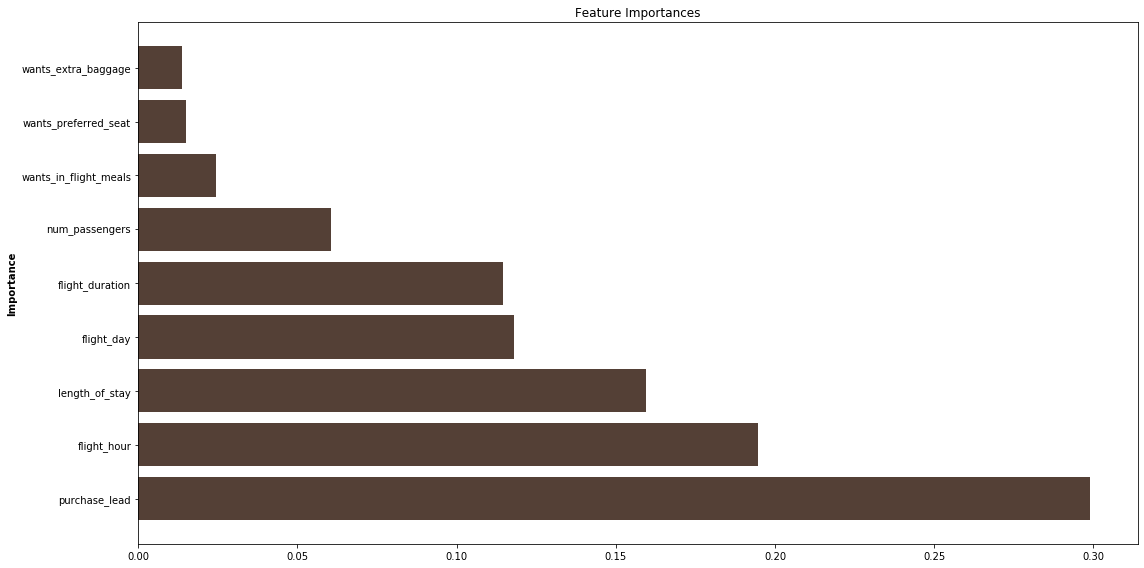

In [74]:
plt.figure(figsize=(16, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color = '#544036')
plt.ylabel('Importance', fontweight='bold')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [81]:
#calculating precision and recall
# calculating true positives
true_positives = sum([1 for pred, actual in zip(predicted_labels, actual_label) if pred == 1 and actual == 1])

In [83]:
false_positives = sum([1 for pred, actual in zip(predicted_labels, actual_label) if pred == 1 and actual == 0])

In [84]:
false_negatives = sum([1 for pred, actual in zip(predicted_labels, actual_label) if pred == 0 and actual == 1])


In [85]:
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)

In [86]:
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.07508532423208192
Recall: 0.015068493150684932
